In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.0 MB/s eta 0:00:000:00:010:00:01:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [4]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.4.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.5-cp37-abi3-manylinux2014_x86_64.whl.m

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# gpus = tf.config.experimental.list_physical_devices("GPU")
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
data_dir = "./data/finalData/handPicked/MBTI_Images/"

In [7]:
# need to mogrify all the images in the png format... command for same in each directory is "mogrify *.png"

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)            

# Loading data

In [10]:
# tf.keras.utils.image_dataset_from_directory??

In [11]:
# Define MBTI personality types mapping to 4 binary labels (E-I, S-N, T-F, J-P)
categoryMap = {
    'ENFJ': [1, 1, 0, 1],  # E-I, S-N, T-F, J-P
    'ENTJ': [1, 1, 1, 1],
    'ESFJ': [1, 0, 0, 1],
    'ESTJ': [1, 0, 1, 1],
    'INFJ': [0, 1, 0, 1],
    'INTJ': [0, 1, 1, 1],
    'ISFJ': [0, 0, 0, 1],
    'ISTJ': [0, 0, 1, 1],
    'ENFP': [1, 1, 0, 0],
    'ENTP': [1, 1, 1, 0],
    'ESFP': [1, 0, 0, 0],
    'ESTP': [1, 0, 1, 0],
    'INFP': [0, 1, 0, 0],
    'INTP': [0, 1, 1, 0],
    'ISFP': [0, 0, 0, 0],
    'ISTP': [0, 0, 1, 0]
}

def map_class_to_mbti_label(class_ids):
    class_names = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                   'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

    class_ids = np.asarray(class_ids)
    
    mbti_labels = np.array([categoryMap[class_names[class_id]] for class_id in class_ids], dtype=np.int32)
    mbti_labels = mbti_labels.reshape(-1, 4)
    
    return mbti_labels

def process_image(image, label):
    image = image / 255.0  # Normalize the image
    # Convert label to MBTI binary labels
    label = tf.py_function(func=map_class_to_mbti_label, inp=[label], Tout=tf.int32)
    label.set_shape([None, 4])  # Batch size, 4 for E-I, S-N, T-F, J-P
    
    return image, label


In [12]:
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,  
    image_size=(200, 200), 
    batch_size=32, 
    shuffle=True,
    class_names=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
)

Found 2948 files belonging to 16 classes.


In [13]:
# data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(200, 200), batch_size=32, shuffle=True, class_names=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']) # Creating/Building the data pipeline

In [14]:
data_iterator = data.as_numpy_iterator() # Allow us to access our data pypeline

In [15]:
batch = data_iterator.next() # actually accessing the data pipeline

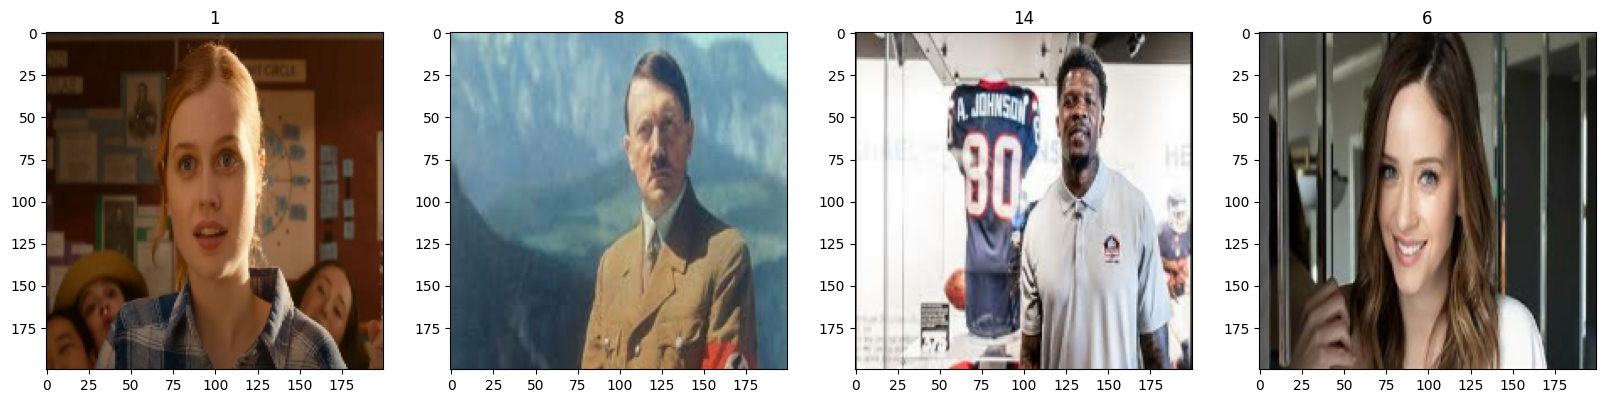

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data Preprocessing

## Scale

In [17]:
# Apply the mapping and normalization to the dataset
data = data.map(process_image)

In [18]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.int32, name=None))>

### Here we need to map our different preprocessed function, or first run the pre-processing function, and then use that data. We should try to integrate the preprocessing function (ie. just cropping the faces) to the pypeline, this might help.

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

In [21]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


In [22]:
print(len(batch[0]))

32


## Split Data

In [23]:
len(data)

93

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1)

In [27]:
train_size + val_size + test_size == len(data)

True

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

## Model Building

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.models import Model

In [31]:
# Load ResNet50 (ResNet18 approximation)
base_model = ResNet50(include_top=False, input_shape=(200, 200, 3), weights='imagenet')
base_model.trainable = False

# Functional model approach
inputs = Input(shape=(200, 200, 3))  # Define input layer
x = base_model(inputs) # Connect input to base model
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)

output_ei = Dense(1, activation='sigmoid', name='output_ei')(x)
output_sn = Dense(1, activation='sigmoid', name='output_sn')(x)
output_tf = Dense(1, activation='sigmoid', name='output_tf')(x)
output_jp = Dense(1, activation='sigmoid', name='output_jp')(x)

outputs = concatenate([output_ei, output_sn, output_tf, output_jp])

model = Model(inputs=inputs, outputs=outputs) # Define the model

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [32]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_1[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 100352)    │          0 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │ 51,380,736 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    262,656 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_ei (Dense)   │ (None, 1)         │        513 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_sn (Dense)   │ (None, 1)         │        513 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_tf (Dense)   │ (None, 1)         │        513 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_jp (Dense)   │ (None, 1)         │        513 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4)         │          0 │ output_ei[0][0],  │
│ (Concatenate)       │                   │            │ output_sn[0][0],  │
│                     │                   │            │ output_tf[0][0],  │
│                     │                   │            │ output_jp[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 75,233,156 (286.99 MB)

 Trainable params: 51,645,444 (197.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Model Training

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.2582 - loss: 6.1765 - val_accuracy: 0.1250 - val_loss: 7.2806
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.1447 - loss: 7.2216 - val_accuracy: 0.1266 - val_loss: 7.7451
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.1615 - loss: 5.3348 - val_accuracy: 0.1102 - val_loss: 0.6924
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.1442 - loss: 0.6963 - val_accuracy: 0.1217 - val_loss: 0.6902
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.1317 - loss: 0.6915 - val_accuracy: 0.1184 - val_loss: 0.6922
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.1375 - loss: 0.6901 - val_accuracy: 0.1234 - val_loss: 0.6905
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.1346 - loss: 0.6973 - val_accuracy: 0.1250 - val_loss: 0.6924
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.1355 - loss: 0.6900 - val_accuracy: 0.1332 - val_loss:

## Plot performance

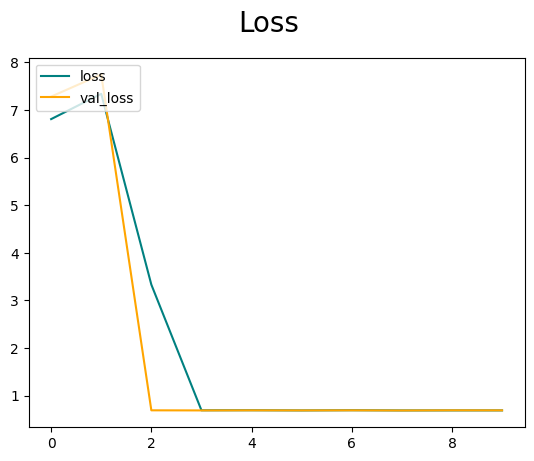

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

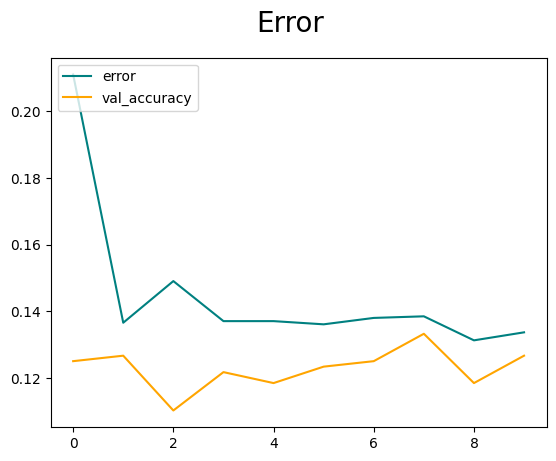

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='error')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Error', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [40]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [41]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Convert predictions to classes (0 or 1) for each MBTI dimension
    yhat_classes = (yhat > 0.5).astype(int)  # Assuming 0.5 as the threshold

    # Reshape y to match yhat_classes if necessary
    if y.shape[1] == 1: # if y represents a single dimension
        y = np.repeat(y, 4, axis=1) # repeat across 4 dimensions for consistency
    elif y.ndim == 1: # if y is a 1D array
        y = y.reshape(-1, 1) # reshape to a column vector
        y = np.repeat(y, 4, axis=1)

    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2024-12-03 14:14:50.539789: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

Precision: 0.5192307829856873
Recall: 0.5263158082962036
Accuracy: 0.5259615182876587


# Test

In [43]:
imageName = "INFP/johnnyDepp.jpeg"
img = cv2.imread(data_dir + imageName) # Read some image, and test...
# plt.imshow(img)
# plt.show()

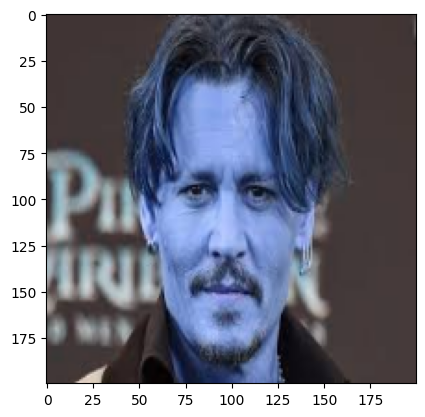

In [44]:
resize = tf.image.resize(img, (200,200))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [46]:
yhat

array([[0.45900884, 0.45977542, 0.5435971 , 0.5029428 ]], dtype=float32)

In [47]:
def predictPersonalityType(yhat):
    personalityType = ""
    
    if yhat[0][0] > 0.5:
        personalityType += "E"
    else:
        personalityType += "I"
    
    if yhat[0][1] > 0.5:
        personalityType += "N"
    else:
        personalityType += "S"
    
    if yhat[0][2] > 0.5:
        personalityType += "T"
    else:
        personalityType += "F"
    
    if yhat[0][3] > 0.5:
        personalityType += "J"
    else:
        personalityType += "P"
    
    print(f"Personality type: {personalityType}")
    return personalityType

predictPersonalityType(yhat)

Personality type: ISTJ


'ISTJ'

# Save the model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models','imageclassifierResNet50Model2Version2.keras'))

In [50]:
new_model = load_model('./models/imageclassifier.keras')